In [35]:
""" 

    import all the library needed for this file

"""
import nltk
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import corpus
import tensorflow as tf 
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense,LSTM,SimpleRNN,Flatten,Activation,Embedding


In [36]:
"""
    loading all the data from csv file to pandas dataframe and
    than convert it into numpy array.

"""
df = pd.read_csv('Data/Twitter_Data.csv')
print(f"Description of dataframe is\n {df.describe()}")
print(f"Shape of dataframe is {df.shape}")

Description of dataframe is
             category
count  162973.000000
mean        0.225436
std         0.781279
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Shape of dataframe is (162980, 2)


In [37]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [38]:
"""
    preprocessing text data removing all the punctuation , 
    stop words , symbols, digits or numbers and all other links
    and html tags etc.

"""


import re
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
punc = list(punctuation)
def text_processing(text):

    text = str(text)
    text = text.lower()
    text = re.sub(r"https\S+|www\S+|https\S+"," ",text,flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)
    text=re.sub("(\\d|\\W)+"," ",text)       
    text = re.sub(r'\@\w+|\#'," ",text) 
    text = re.sub(r'[^\w\s\`]'," ",text)   
    text_tokens = word_tokenize(text) 
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text_tokens if not word in punc] 
    text1 = " ".join(text)
    return text1

def transform(text):

    if text== -1.0:
        return 0
    elif text == 0.0:
        return 1  
    elif text == 1.0:
        return 2
    else:
        return 0

df['clean_text'] = df['clean_text'].apply(text_processing)
df['category'] = df['category'].apply(transform)

In [39]:
"""
this is how cleaned data is
"""
df.head(5)

,clean_text,category
0,when modi promis minimum govern maximum govern...,0
1,talk all the nonsens and continu all the drama...,1
2,what did just say vote for modi welcom bjp tol...,2
3,ask his support prefix chowkidar their name mo...,2
4,answer who among these the most power world le...,2


In [40]:
"""
    splitting data into train and test portion
"""
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['clean_text'],df['category'],test_size=0.3,shuffle=True)
print(f"Shape of x_train is {x_train.shape}")
print(f"Shape of x_text is {x_test.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of x_train is (114086,)
Shape of x_text is (48894,)
Shape of y_train is (114086,)
Shape of y_test is (48894,)


In [41]:

""" 
    converting text into numerical representation 
    so that we can train the model.

"""

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)
maxLen = 0
for i in x_train:
    maxLen = max(len(i),maxLen)
x_train = pad_sequences(x_train,maxlen=maxLen,padding='post')
x_test = pad_sequences(x_test,maxlen=maxLen,padding='post')

In [42]:
"""
    building model and training on the data
    and finding the accuracy of model.

"""
model = Sequential()
model.add(Embedding(input_dim=114086,input_length=maxLen,output_dim=30))
model.add(LSTM(100,activation='tanh'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='Adam',metrics=['accuracy'],loss='categorical_crossentropy')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 50, 30)            3422580   
                                                                 
 lstm_10 (LSTM)              (None, 100)               52400     
                                                                 
 dense_12 (Dense)            (None, 3)                 303       
                                                                 
Total params: 3475283 (13.26 MB)
Trainable params: 3475283 (13.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
history = model.fit(x=x_train,y=y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
3566/3566 [==============================] - 240s 67ms/step - loss: 0.5295 - accuracy: 0.7955 - val_loss: 0.4012 - val_accuracy: 0.8539
Epoch 2/10
3566/3566 [==============================] - 241s 67ms/step - loss: 0.3351 - accuracy: 0.8792 - val_loss: 0.3250 - val_accuracy: 0.8823
Epoch 3/10
3566/3566 [==============================] - 240s 67ms/step - loss: 0.2639 - accuracy: 0.9086 - val_loss: 0.3003 - val_accuracy: 0.8948
Epoch 4/10
3566/3566 [==============================] - 241s 68ms/step - loss: 0.2112 - accuracy: 0.9286 - val_loss: 0.2944 - val_accuracy: 0.8982
Epoch 5/10
3566/3566 [==============================] - 242s 68ms/step - loss: 0.1628 - accuracy: 0.9450 - val_loss: 0.3122 - val_accuracy: 0.8919
Epoch 6/10
3566/3566 [==============================] - 240s 67ms/step - loss: 0.1271 - accuracy: 0.9570 - val_loss: 0.3408 - val_accuracy: 0.8882
Epoch 7/10
3566/3566 [==============================] - 240s 67ms/step - loss: 0.1007 - accuracy: 0.9664 - val_loss: 0

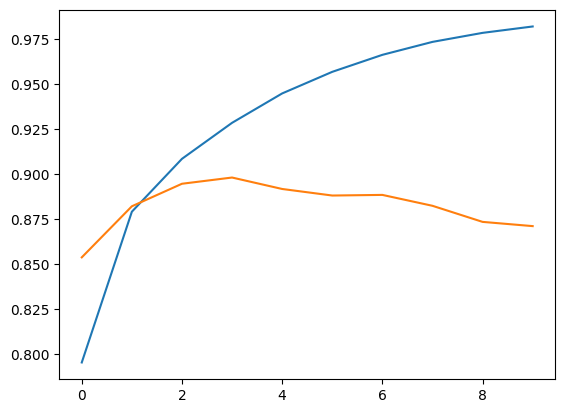

In [48]:
"""
    visualizing training loss and validation loss using 
    matplotlib.pyplot 
    
"""

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.savefig('lstm_loss.png')
plt.show()

In [58]:
"""
    testing that model is working fine or not 

"""

test_text = "i am a good boy"
seq = tokenizer.texts_to_sequences(test_text)
padded_seq = pad_sequences(seq,maxlen=maxLen,padding="post")
prediction = model.predict(padded_seq)
prediction_class = prediction.argmax(axis=-1)
if prediction_class[0] == -1:
    print("There is a negative sentiment ")
if prediction_class[0] == 0:
    print("There is a neutral sentiment ")
if prediction_class[0] == 1:
    print("There is a positive sentiment ")

1/1 [==============================] - 0s 24ms/step
There is a positive sentiment 


In [50]:
text = "This is a fantastic movie"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=52) 
predictions = model.predict(new_text_padded)
predicted_class = predictions.argmax(axis=-1)
if predicted_class[0] == 0:
    print("neutral Sentiment");
elif predicted_class[0] == 1:
    print("positive Sentiment")
else:
    print("Neutral Sentiment")

1/1 [==============================] - 0s 21ms/step
positive Sentiment


In [60]:
def predict(test_text):
    seq = tokenizer.texts_to_sequences(test_text)
    padded_seq = pad_sequences(seq,maxlen=maxLen,padding="post")
    prediction = model.predict(padded_seq)
    prediction_class = prediction.argmax(axis=-1)
    if prediction_class[0] == -1:
        print("There is a negative sentiment ")
    if prediction_class[0] == 0:
        print("There is a neutral sentiment ")
    if prediction_class[0] == 1:
        print("There is a positive sentiment ")
    